<a href="https://colab.research.google.com/github/saki601/machine-learning-class/blob/main/labor_prefinals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geotext

import matplotlib.pyplot as plt, seaborn as sns, pandas as pd, re, xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer


from geotext import GeoText

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Copy of scraped_dataset.csv')

In [ ]:
file.head()

,Title,Author,Logged Count,Rating,Genres
0,Atomic Habits,James Clear,First published in 2016\n —\n ...,4.1 (910 ratings),"Habit, Habit breaking, Behavior modification, ..."
1,It Ends With Us,Colleen Hoover,First published in 2012\n —\n ...,4.2 (976 ratings),"Fiction, Romance, Contemporary, Life change ev..."
2,The 48 Laws of Power,Robert Greene,First published in 1998\n —\n ...,4.1 (827 ratings),"Business, Control (Psychology), Contrôle (Psyc..."
3,The Subtle Art of Not Giving a F*ck,Mark Manson,First published in 2016\n —\n ...,4.1 (616 ratings),"Self-realization, Conduct of life, Conducta de..."
4,Um casamento arranjado,Zana Kheiron,First published in 2019\n —\n ...,"4.1 (1,126 ratings)","romance, love"


In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         572 non-null    object
 1   Author        572 non-null    object
 2   Logged Count  572 non-null    object
 3   Rating        572 non-null    object
 4   Genres        551 non-null    object
dtypes: object(5)
memory usage: 22.5+ KB


In [ ]:
file.isnull().sum()

,0
Title,0
Author,0
Logged Count,0
Rating,0
Genres,21


In [ ]:
most_frequent_genre = file['Genres'].mode()[0]
file['Genres'].fillna(most_frequent_genre, inplace=True)

<ipython-input-7-f9d69ca71832>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  file['Genres'].fillna(most_frequent_genre, inplace=True)


In [ ]:
file.duplicated().sum()

8

In [ ]:
file.drop_duplicates(inplace=True)

In [ ]:
file.head()

,Title,Author,Logged Count,Rating,Genres
0,Atomic Habits,James Clear,First published in 2016\n —\n ...,4.1 (910 ratings),"Habit, Habit breaking, Behavior modification, ..."
1,It Ends With Us,Colleen Hoover,First published in 2012\n —\n ...,4.2 (976 ratings),"Fiction, Romance, Contemporary, Life change ev..."
2,The 48 Laws of Power,Robert Greene,First published in 1998\n —\n ...,4.1 (827 ratings),"Business, Control (Psychology), Contrôle (Psyc..."
3,The Subtle Art of Not Giving a F*ck,Mark Manson,First published in 2016\n —\n ...,4.1 (616 ratings),"Self-realization, Conduct of life, Conducta de..."
4,Um casamento arranjado,Zana Kheiron,First published in 2019\n —\n ...,"4.1 (1,126 ratings)","romance, love"


In [ ]:
file.iloc[0]

,0
Title,Atomic Habits
Author,James Clear
Logged Count,First published in 2016\n —\n ...
Rating,4.1 (910 ratings)
Genres,"Habit, Habit breaking, Behavior modification, ..."


In [ ]:
file.iloc[60]['Logged Count']

'First published in 1945\n            —\n            \n411 editions'

In [ ]:
file['Logged Count'] = file['Logged Count'].str.replace(r'\\n', '', regex=True).str.replace(r'\\', '', regex=True).str.replace(r'--', '', regex=True)

In [ ]:
file.head()

,Title,Author,Logged Count,Rating,Genres
0,Atomic Habits,James Clear,First published in 2016\n —\n ...,4.1 (910 ratings),"Habit, Habit breaking, Behavior modification, ..."
1,It Ends With Us,Colleen Hoover,First published in 2012\n —\n ...,4.2 (976 ratings),"Fiction, Romance, Contemporary, Life change ev..."
2,The 48 Laws of Power,Robert Greene,First published in 1998\n —\n ...,4.1 (827 ratings),"Business, Control (Psychology), Contrôle (Psyc..."
3,The Subtle Art of Not Giving a F*ck,Mark Manson,First published in 2016\n —\n ...,4.1 (616 ratings),"Self-realization, Conduct of life, Conducta de..."
4,Um casamento arranjado,Zana Kheiron,First published in 2019\n —\n ...,"4.1 (1,126 ratings)","romance, love"


In [ ]:
new_columns = file['Logged Count'].str.split('\n', n=1, expand=True) # Limit the split to 1 space
new_columns.columns = ['Published (Year)', 'Edition']
file = pd.concat([file, new_columns], axis=1)

In [ ]:
file

,Title,Author,Logged Count,Rating,Genres,Published (Year),Edition
0,Atomic Habits,James Clear,First published in 2016\n —\n ...,4.1 (910 ratings),"Habit, Habit breaking, Behavior modification, ...",First published in 2016,—\n \n41 editions
1,It Ends With Us,Colleen Hoover,First published in 2012\n —\n ...,4.2 (976 ratings),"Fiction, Romance, Contemporary, Life change ev...",First published in 2012,—\n \n34 editions
2,The 48 Laws of Power,Robert Greene,First published in 1998\n —\n ...,4.1 (827 ratings),"Business, Control (Psychology), Contrôle (Psyc...",First published in 1998,—\n \n52 editions
3,The Subtle Art of Not Giving a F*ck,Mark Manson,First published in 2016\n —\n ...,4.1 (616 ratings),"Self-realization, Conduct of life, Conducta de...",First published in 2016,—\n \n41 editions
4,Um casamento arranjado,Zana Kheiron,First published in 2019\n —\n ...,"4.1 (1,126 ratings)","romance, love",First published in 2019,—\n \n15 editions
...,...,...,...,...,...,...,...
567,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,First published in 2006\n —\n ...,4.5 (12 ratings),"nyt:paperback_advice=2012-02-11, Man-woman rel...",First published in 2006,—\n \n10 editions
568,En man som heter Ove,Fredrik Backman,First published in 2012\n —\n ...,4.2 (56 ratings),"Novel, translation, Neighbors, Older men, Neig...",First published in 2012,—\n \n36 editions
569,For Whom the Bell Tolls,Ernest Hemingway,First published in 1940\n —\n ...,3.5 (17 ratings),"Spain in fiction, Fiction, History, Spanish Ci...",First published in 1940,—\n \n167 editions
570,The Kiss Quotient,Helen Hoang,First published in 2018\n —\n ...,3.9 (9 ratings),"Asperger's syndrome, Women mathematicians, fic...",First published in 2018,—\n \n14 editions


In [ ]:
file['Edition'] = file['Edition'].str.replace(r'—|\n|\s+', ' ', regex=True)

In [ ]:
file.drop('Logged Count', axis=1, inplace=True)

In [ ]:
file['Edition']=file['Edition'].str.extract('(\d+)')

In [ ]:
file['Published (Year)']=file['Published (Year)'].str.extract('(\d+)')

In [ ]:
file

,Title,Author,Rating,Genres,Published (Year),Edition
0,Atomic Habits,James Clear,4.1 (910 ratings),"Habit, Habit breaking, Behavior modification, ...",2016,41
1,It Ends With Us,Colleen Hoover,4.2 (976 ratings),"Fiction, Romance, Contemporary, Life change ev...",2012,34
2,The 48 Laws of Power,Robert Greene,4.1 (827 ratings),"Business, Control (Psychology), Contrôle (Psyc...",1998,52
3,The Subtle Art of Not Giving a F*ck,Mark Manson,4.1 (616 ratings),"Self-realization, Conduct of life, Conducta de...",2016,41
4,Um casamento arranjado,Zana Kheiron,"4.1 (1,126 ratings)","romance, love",2019,15
...,...,...,...,...,...,...
567,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.5 (12 ratings),"nyt:paperback_advice=2012-02-11, Man-woman rel...",2006,10
568,En man som heter Ove,Fredrik Backman,4.2 (56 ratings),"Novel, translation, Neighbors, Older men, Neig...",2012,36
569,For Whom the Bell Tolls,Ernest Hemingway,3.5 (17 ratings),"Spain in fiction, Fiction, History, Spanish Ci...",1940,167
570,The Kiss Quotient,Helen Hoang,3.9 (9 ratings),"Asperger's syndrome, Women mathematicians, fic...",2018,14


In [ ]:
file['country'] = file['Genres'].apply(lambda x: ", ".join(set(GeoText(str(x)).countries)) if GeoText(str(x)).countries else None)
file

,Title,Author,Rating,Genres,Published (Year),Edition,country
0,Atomic Habits,James Clear,4.1 (910 ratings),"Habit, Habit breaking, Behavior modification, ...",2016,41,None
1,It Ends With Us,Colleen Hoover,4.2 (976 ratings),"Fiction, Romance, Contemporary, Life change ev...",2012,34,None
2,The 48 Laws of Power,Robert Greene,4.1 (827 ratings),"Business, Control (Psychology), Contrôle (Psyc...",1998,52,None
3,The Subtle Art of Not Giving a F*ck,Mark Manson,4.1 (616 ratings),"Self-realization, Conduct of life, Conducta de...",2016,41,Russia
4,Um casamento arranjado,Zana Kheiron,"4.1 (1,126 ratings)","romance, love",2019,15,None
...,...,...,...,...,...,...,...
567,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.5 (12 ratings),"nyt:paperback_advice=2012-02-11, Man-woman rel...",2006,10,None
568,En man som heter Ove,Fredrik Backman,4.2 (56 ratings),"Novel, translation, Neighbors, Older men, Neig...",2012,36,Sweden
569,For Whom the Bell Tolls,Ernest Hemingway,3.5 (17 ratings),"Spain in fiction, Fiction, History, Spanish Ci...",1940,167,Spain
570,The Kiss Quotient,Helen Hoang,3.9 (9 ratings),"Asperger's syndrome, Women mathematicians, fic...",2018,14,None


In [ ]:
file['Average Rating'] = file['Rating'].str.extract(r'(\d+\.?\d*)').astype(float)

In [ ]:
file

,Title,Author,Rating,Genres,Published (Year),Edition,country
0,Atomic Habits,James Clear,4.1 (910 ratings),"Habit, Habit breaking, Behavior modification, ...",2016,41,None
1,It Ends With Us,Colleen Hoover,4.2 (976 ratings),"Fiction, Romance, Contemporary, Life change ev...",2012,34,None
2,The 48 Laws of Power,Robert Greene,4.1 (827 ratings),"Business, Control (Psychology), Contrôle (Psyc...",1998,52,None
3,The Subtle Art of Not Giving a F*ck,Mark Manson,4.1 (616 ratings),"Self-realization, Conduct of life, Conducta de...",2016,41,Russia
4,Um casamento arranjado,Zana Kheiron,"4.1 (1,126 ratings)","romance, love",2019,15,None
...,...,...,...,...,...,...,...
567,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.5 (12 ratings),"nyt:paperback_advice=2012-02-11, Man-woman rel...",2006,10,None
568,En man som heter Ove,Fredrik Backman,4.2 (56 ratings),"Novel, translation, Neighbors, Older men, Neig...",2012,36,Sweden
569,For Whom the Bell Tolls,Ernest Hemingway,3.5 (17 ratings),"Spain in fiction, Fiction, History, Spanish Ci...",1940,167,Spain
570,The Kiss Quotient,Helen Hoang,3.9 (9 ratings),"Asperger's syndrome, Women mathematicians, fic...",2018,14,None


In [ ]:
file['Rating Count'] = file['Rating'].str.extract(r'\((\d+)\)').astype(float).fillna(0).astype(int)

In [ ]:
file['Rating Count'] = file['Rating'].str.extract(r'\((\d+.?\d*)\s*[rR]atings?\)')
file['Rating Count'] = pd.to_numeric(file['Rating Count'].str.replace(',', '').str.replace('ratings', ''), errors='coerce').fillna(0).astype(int)

In [ ]:
file.drop('Rating', axis=1, inplace=True)
file

,Title,Author,Genres,Published (Year),Edition,country,Rating Count
0,Atomic Habits,James Clear,"Habit, Habit breaking, Behavior modification, ...",2016,41,None,910
1,It Ends With Us,Colleen Hoover,"Fiction, Romance, Contemporary, Life change ev...",2012,34,None,976
2,The 48 Laws of Power,Robert Greene,"Business, Control (Psychology), Contrôle (Psyc...",1998,52,None,827
3,The Subtle Art of Not Giving a F*ck,Mark Manson,"Self-realization, Conduct of life, Conducta de...",2016,41,Russia,616
4,Um casamento arranjado,Zana Kheiron,"romance, love",2019,15,None,1126
...,...,...,...,...,...,...,...
567,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,"nyt:paperback_advice=2012-02-11, Man-woman rel...",2006,10,None,12
568,En man som heter Ove,Fredrik Backman,"Novel, translation, Neighbors, Older men, Neig...",2012,36,Sweden,56
569,For Whom the Bell Tolls,Ernest Hemingway,"Spain in fiction, Fiction, History, Spanish Ci...",1940,167,Spain,17
570,The Kiss Quotient,Helen Hoang,"Asperger's syndrome, Women mathematicians, fic...",2018,14,None,9


# Data Visulization - Exploration

In [ ]:
file = file.rename(columns={'Genres': 'Topics and Genres'})

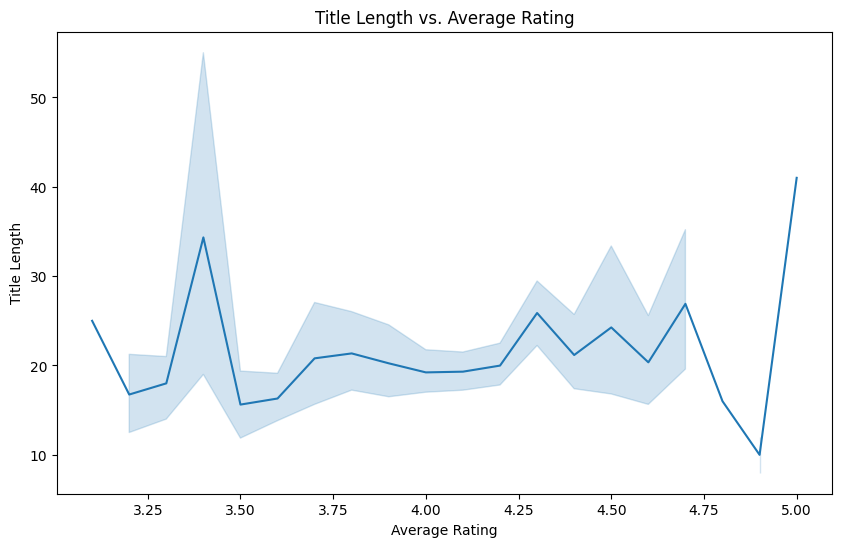

In [ ]:
file['Title Length'] = file['Title'].str.len()

plt.figure(figsize=(10, 6))
sns.lineplot(y='Title Length', x='Average Rating', data=file)
plt.title('Title Length vs. Average Rating')
plt.ylabel('Title Length')
plt.xlabel('Average Rating')
plt.show()

In [ ]:
# prompt: write code that checks the frequency of each word in the file['genres and columns'] then  createa a frequency counter of it all

import pandas as pd
from collections import Counter

# Assuming 'file' DataFrame is already loaded as in the provided code

# Function to count word frequencies
def word_frequency(text):
    words = re.findall(r'\b\w+\b', str(text).lower())  # Extract words, convert to lowercase
    return Counter(words)

# Apply to 'Topics and Genres' column
file['word_counts'] = file['Topics and Genres'].apply(word_frequency)

# Aggregate word frequencies from all rows
all_word_counts = Counter()
for counts in file['word_counts']:
    all_word_counts.update(counts)

# Aggregate word frequencies from all rows
all_word_counts = Counter()
for counts in file['word_counts']:
    all_word_counts.update(counts)

print("Frequency of each word in 'Topics and Genres' column:")
for word, count in all_word_counts.items():
  print(f"{word}: {count}")

print("\nTotal word frequency count:")
all_word_counts

Streaming output truncated to the last 5000 lines.
colin: 2
whistledown: 1
libraries: 4
choix: 3
bibliothèques: 1
rhyme: 8
gatos: 2
seat: 1
chats: 2
rim: 1
es: 5
hats: 1
gaea: 1
thanatos: 1
clásica: 1
profecías: 1
thalia: 1
mars: 7
reyna: 2
fransisco: 1
alaska: 4
marketingmanagement: 2
marketingmix: 1
marché: 1
theorie: 1
hunger: 3
zorros: 1
tunnels: 1
interviews: 3
farmers: 1
rats: 1
thieves: 5
tricksters: 3
badgers: 1
underground: 1
renards: 1
agriculteurs: 1
boggis: 1
bunce: 1
fox: 2
countryside: 1
ballad: 1
songbirds: 1
snakes: 1
coriolanus: 1
adaptability: 1
changement: 2
xing: 1
wei: 1
gai: 1
bian: 1
shu: 1
realisation: 1
psychic: 7
pz7: 3
a54385: 1
sp: 1
fic: 5
sociological: 6
paperback_business_books: 3
socioeconomic: 1
factors: 1
mining: 3
stakes: 1
tests: 3
nominative: 1
collusion: 1
sumo: 2
association: 1
real: 2
estate: 1
illegal: 3
earnings: 1
crack: 1
legalized: 1
abortion: 1
incentives: 1
cheating: 1
economia: 3
sociais: 1
informação: 1
économie: 4
sociologique: 1
econom

Counter({'habit': 4,
         'breaking': 2,
         'behavior': 32,
         'modification': 3,
         'self': 151,
         'actualization': 28,
         'psychology': 165,
         'business': 66,
         'personal': 78,
         'growth': 22,
         'new': 470,
         'york': 385,
         'times': 312,
         'bestseller': 236,
         'economics': 40,
         'organizational': 5,
         'social': 265,
         'help': 36,
         'general': 479,
         'fiction': 4756,
         'romance': 268,
         'contemporary': 79,
         'life': 244,
         'change': 13,
         'events': 9,
         'triangles': 8,
         'interpersonal': 73,
         'relations': 122,
         'man': 78,
         'woman': 59,
         'relationships': 77,
         'neurosurgeons': 3,
         'first': 28,
         'loves': 9,
         'businesswomen': 1,
         'women': 183,
         'collectionid': 69,
         'nyt2020s': 4,
         'boston': 14,
         'mass': 15,
       

In [ ]:
# prompt: put into a list the words that have a wordcount greater than 300

import re
from collections import Counter

# ... (Your existing code)

# Aggregate word frequencies from all rows
all_word_counts = Counter()
for counts in file['word_counts']:
    all_word_counts.update(counts)

words_greater_than_300 = [word for word, count in all_word_counts.items() if count > 300]
print("\nWords with a count greater than 300:")
words_greater_than_300


Words with a count greater than 300:


['new',
 'york',
 'times',
 'general',
 'fiction',
 'of',
 'and',
 'language',
 'stories',
 'juvenile',
 'fantasy',
 'in',
 'literature',
 'children',
 's',
 'fictitious',
 'character',
 'english',
 'reading',
 'level',
 'grade',
 'books',
 'american']

contains words that has 300 word count

In [ ]:
topics = ['general','general','language',
 'stories',
 'juvenile',
 'fantasy',
 'literature',
 'children',
 'fictitious',
 'english']

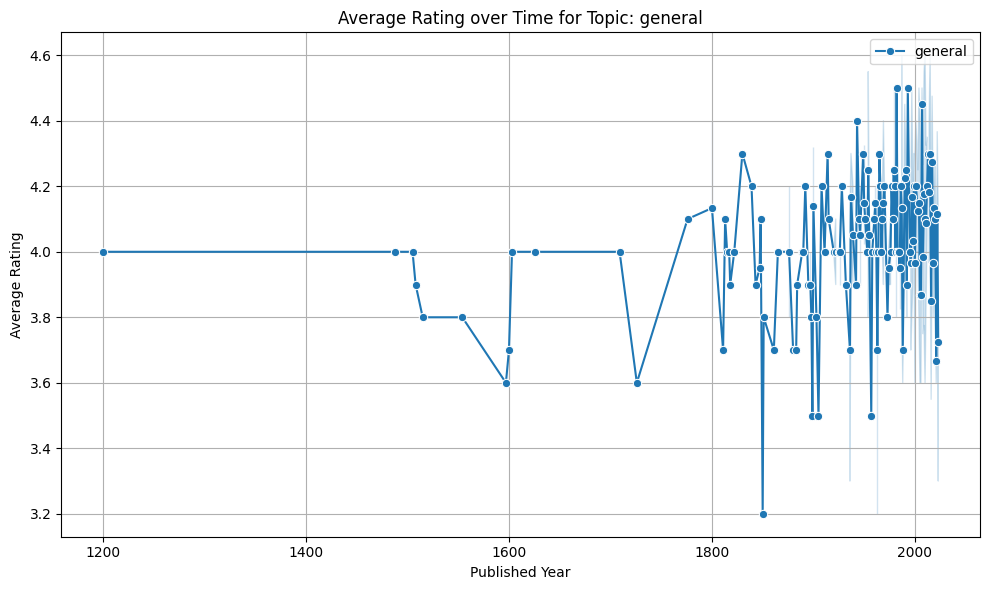

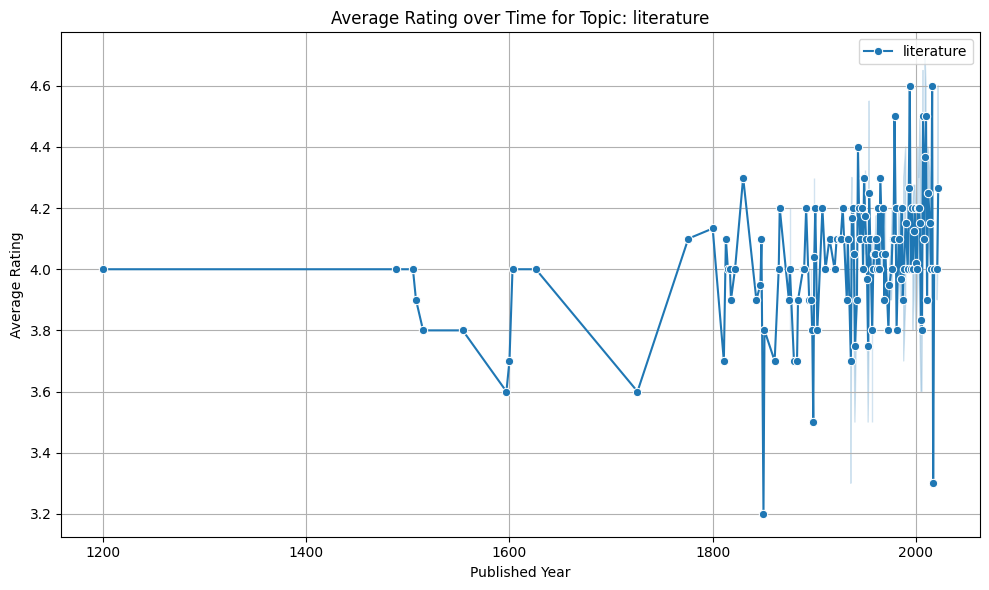

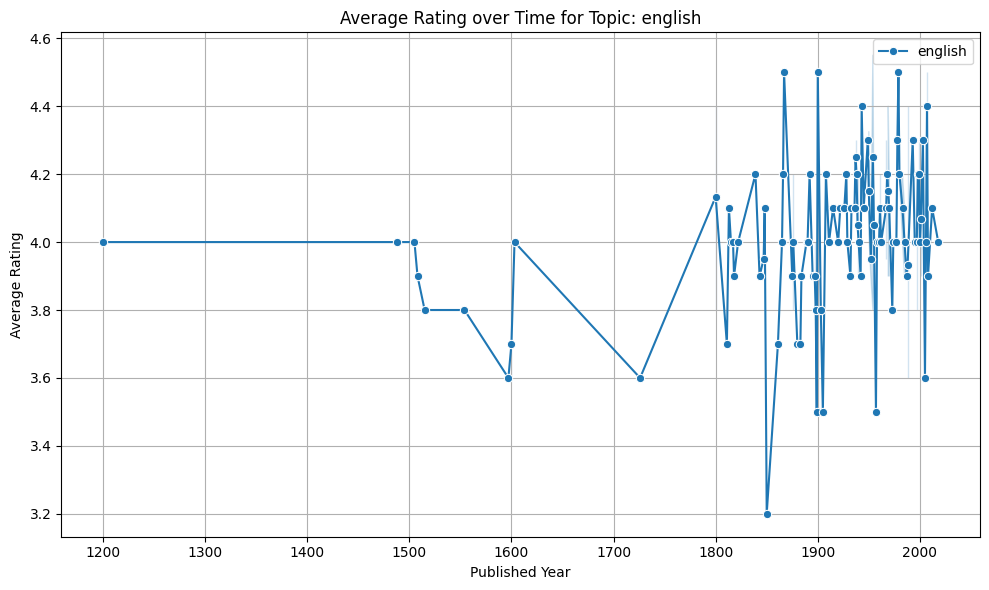

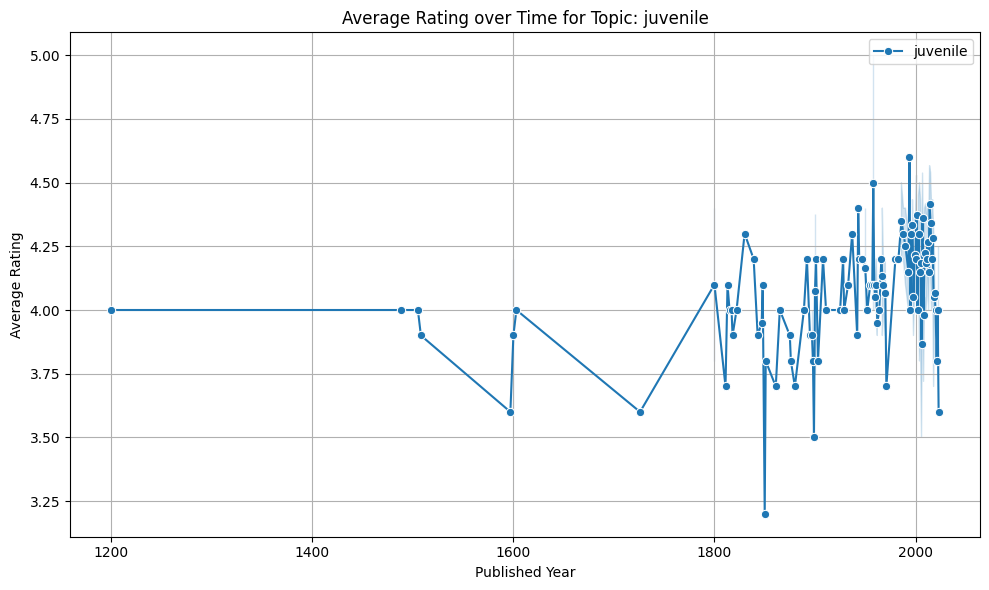

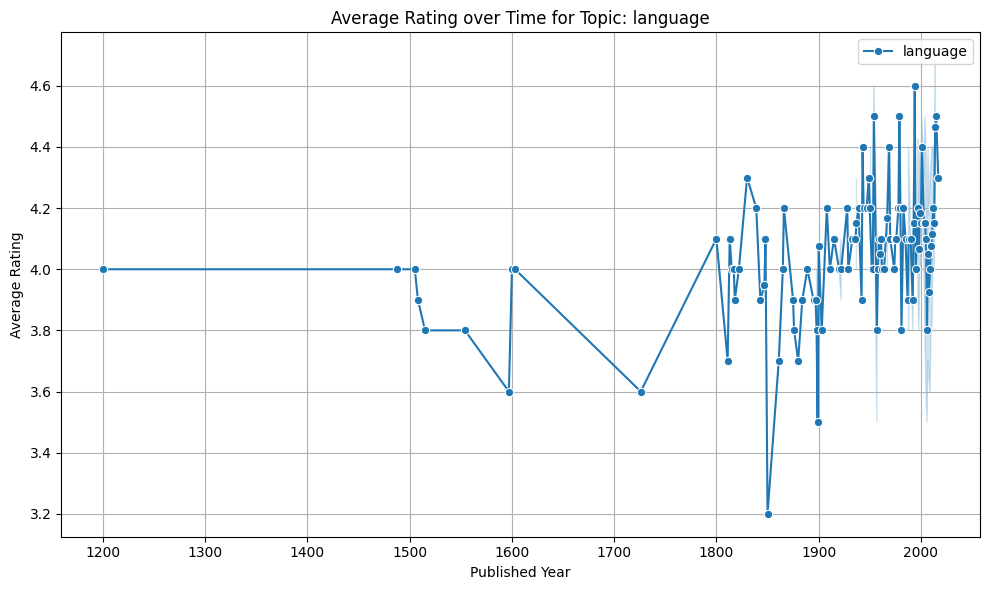

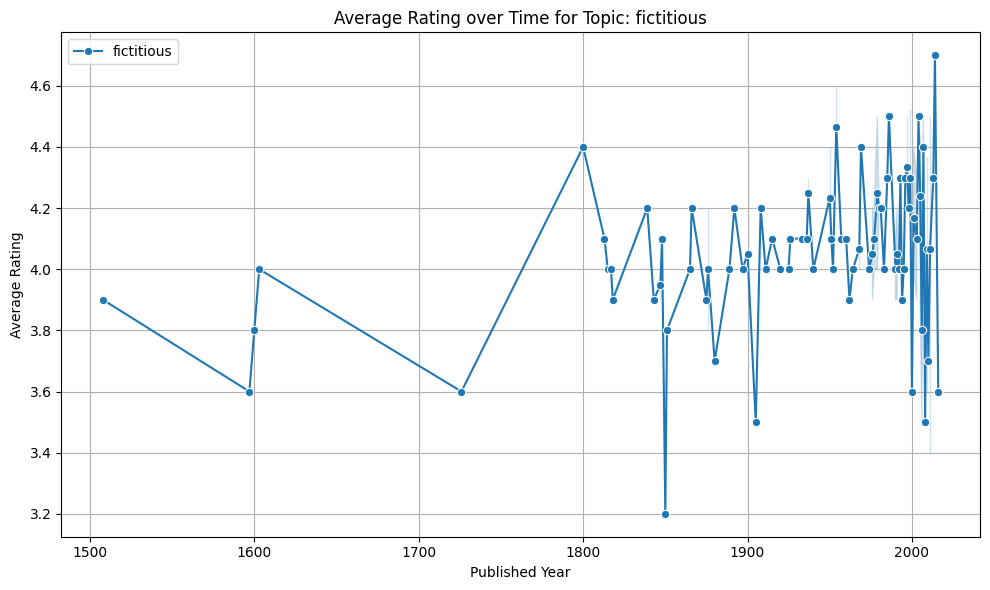

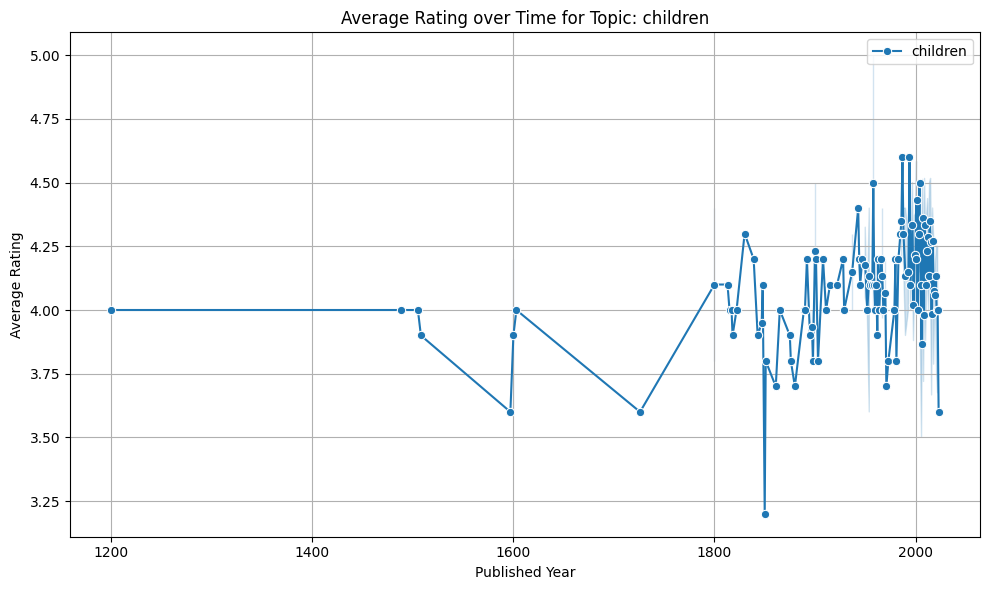

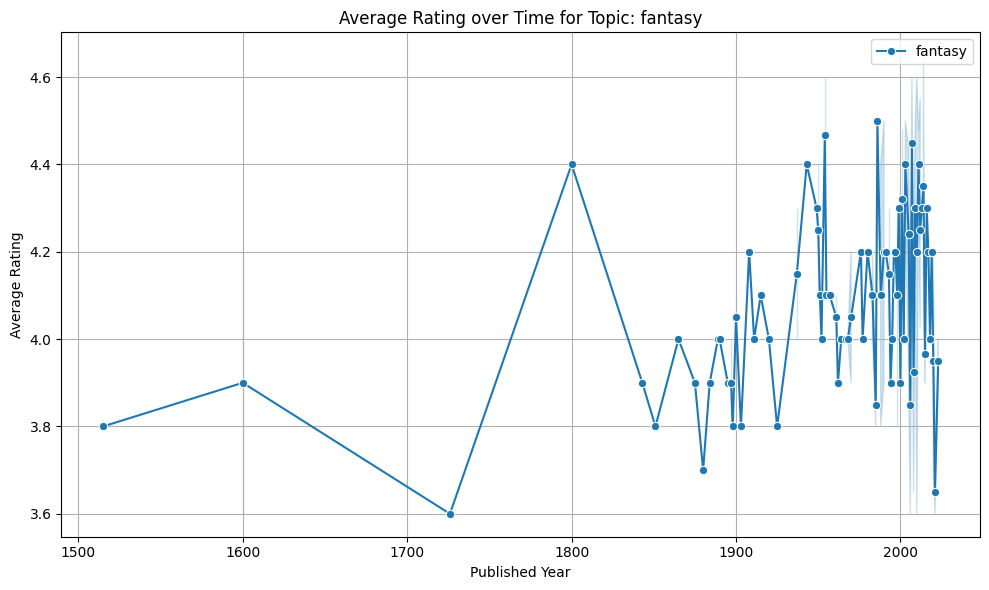

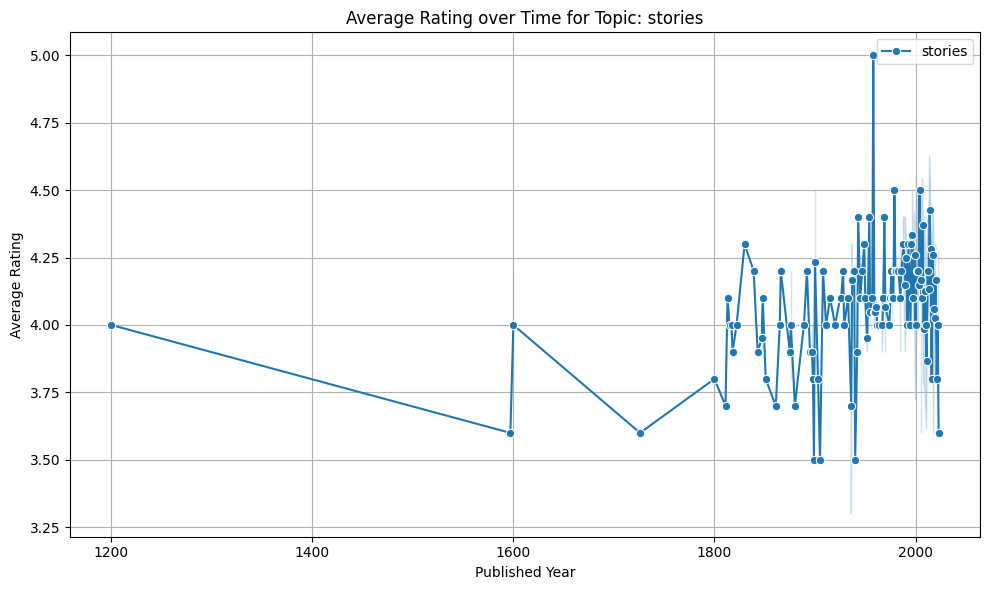

In [ ]:
file['Published (Year)'] = pd.to_numeric(file['Published (Year)'], errors='coerce')

for topic in set(topics):
    topic_data = file[file['Topics and Genres'].str.contains(topic, case=False, na=False)]

    if not topic_data.empty:
        plt.figure(figsize=(10, 6))
        sns.lineplot(x='Published (Year)', y='Average Rating', data=topic_data, label=topic, marker='o')
        plt.title(f'Average Rating over Time for Topic: {topic}')
        plt.xlabel('Published Year')
        plt.ylabel('Average Rating')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data found for topic: {topic}")

<ipython-input-131-4062f0a7ab87>:9: UserWarning: Glyph 21016 (\N{CJK UNIFIED IDEOGRAPH-5218}) missing from current font.
  plt.tight_layout() # Adjust layout to prevent labels from overlapping
<ipython-input-131-4062f0a7ab87>:9: UserWarning: Glyph 24904 (\N{CJK UNIFIED IDEOGRAPH-6148}) missing from current font.
  plt.tight_layout() # Adjust layout to prevent labels from overlapping
<ipython-input-131-4062f0a7ab87>:9: UserWarning: Glyph 27427 (\N{CJK UNIFIED IDEOGRAPH-6B23}) missing from current font.
  plt.tight_layout() # Adjust layout to prevent labels from overlapping
<ipython-input-131-4062f0a7ab87>:9: UserWarning: Glyph 26449 (\N{CJK UNIFIED IDEOGRAPH-6751}) missing from current font.
  plt.tight_layout() # Adjust layout to prevent labels from overlapping
<ipython-input-131-4062f0a7ab87>:9: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  plt.tight_layout() # Adjust layout to prevent labels from overlapping
<ipython-input-131-4062f0a7ab87>:9:

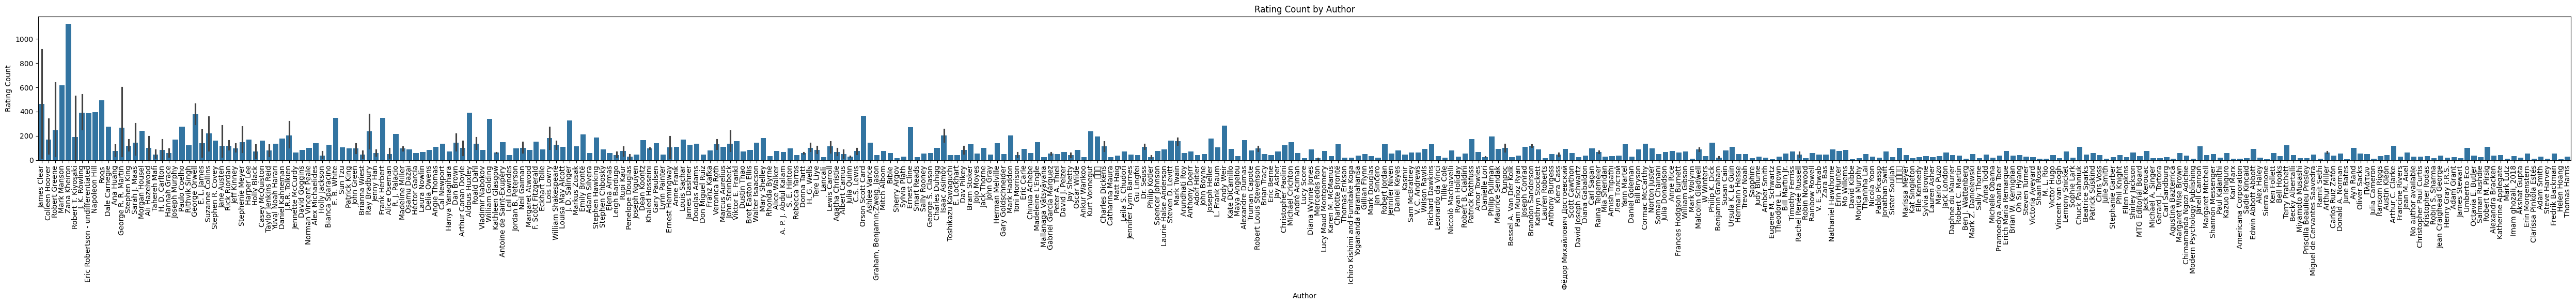

In [ ]:
# prompt: generate a barplot on number of rating count and author

plt.figure(figsize=(50, 6))
sns.barplot(x='Author', y='Rating Count', data=file)
plt.title('Rating Count by Author')
plt.xlabel('Author')
plt.ylabel('Rating Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Dummies

In [ ]:
# Encode Genres as one-hot features
genres = file['Topics and Genres'].str.lower().str.split(',').explode().str.strip()
genre_dummies = pd.get_dummies(genres).groupby(level=0).sum()

# Clean column names
genre_dummies.columns = genre_dummies.columns.str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

# Remove non-alphabetic columns
for i in genre_dummies.columns:
    try:
        if not i.isalpha():  # Simplified condition
            genre_dummies.drop(i, axis=1, inplace=True)
    except KeyError:
        pass

# Remove duplicate columns (alternative approach using set)
# This replaces the previous loop with 'l' and 'counter'
genre_dummies = genre_dummies.loc[:, ~genre_dummies.columns.duplicated()]

# Join with original dataframe and drop the original column
file = file.join(genre_dummies).drop(columns=['Topics and Genres']) # Changed column name to 'Topics and Genres'

In [ ]:
file.drop('country', axis=1, inplace=True)
file

,Title,Author,Published (Year),Edition,Rating Count,france,t,document,fic,seriesthroneofglass,...,motions,omer,owyn,tat,tatsunis,tudiants,xito,berleben,bersetzung,ene
0,Atomic Habits,James Clear,2016,41,910,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,It Ends With Us,Colleen Hoover,2012,34,976,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The 48 Laws of Power,Robert Greene,1998,52,827,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Subtle Art of Not Giving a F*ck,Mark Manson,2016,41,616,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Um casamento arranjado,Zana Kheiron,2019,15,1126,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,2006,10,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
568,En man som heter Ove,Fredrik Backman,2012,36,56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
569,For Whom the Bell Tolls,Ernest Hemingway,1940,167,17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
570,The Kiss Quotient,Helen Hoang,2018,14,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = file.drop(['Average Rating','Title','Author','word_counts','Dominant Topic'], axis=1)
y = file['Average Rating']

X.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.10190983185840709
R-squared: 0.034653825667655735


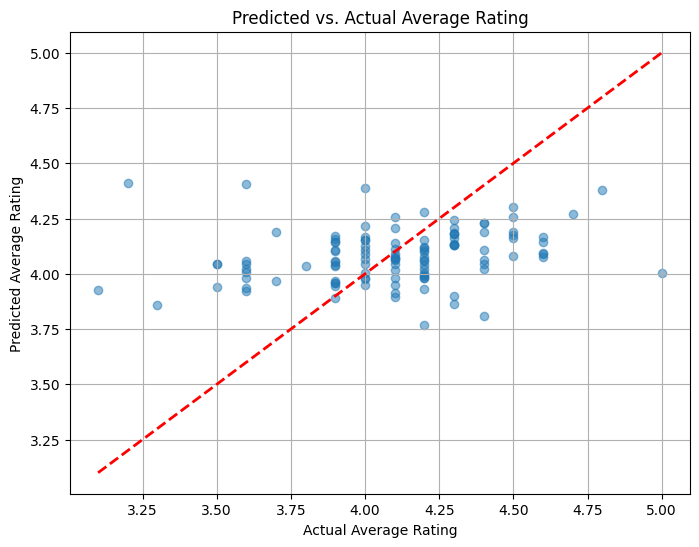

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # alpha controls transparency
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel("Actual Average Rating")
plt.ylabel("Predicted Average Rating")
plt.title("Predicted vs. Actual Average Rating")
plt.grid(True)
plt.show()

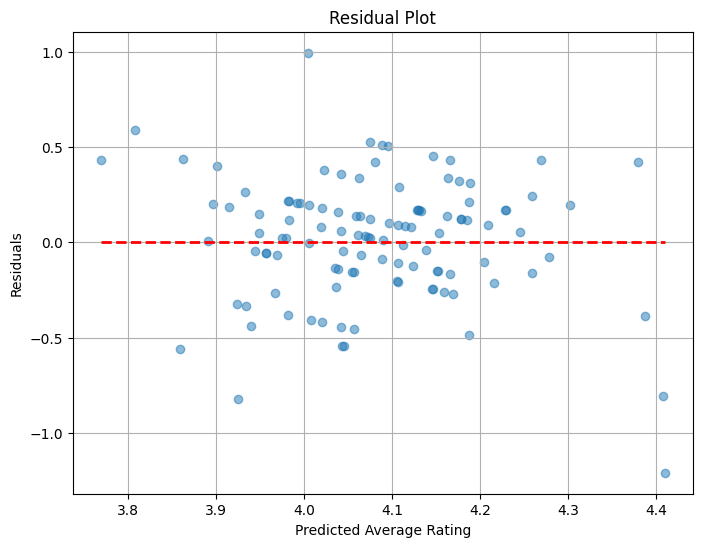

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='r', linestyle='--', lw=2)
plt.xlabel("Predicted Average Rating")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

In [ ]:
model = xgb.XGBRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


**Analyses:**

Exploratory Data Analysis (EDA):
Word frequency analysis was performed on 'Topics and Genres' to identify prevalent topics.
Visualizations were created using seaborn and matplotlib to understand relationships:
Title Length vs. Average Rating (line plot)
Average Rating over Time for specific topics (line plots)
Rating Count by Author (bar plot)


**Model:**

Predictive Modeling:
The code utilizes two regression models to predict the 'Average Rating':
RandomForestRegressor: A robust ensemble model known for its accuracy.
XGBRegressor: A gradient boosting model also known for its high performance.
Model evaluation was performed using metrics like Mean Squared Error (MSE) and R-squared to assess their predictive power. Visualizations like scatter plots and residual plots were used to further analyze the model performance.
the models performed poorly on the data.

1. Incorporate Text Reviews with NLP:

Sentiment Analysis: Extract and analyze the sentiment expressed in text reviews associated with books. This could provide valuable insights into how readers perceive the books and potentially improve the accuracy of predicting ratings.
Topic Modeling: Employ techniques like Latent Dirichlet Allocation (LDA) to uncover hidden themes within the text reviews. These topics could be used as additional features in your models.
Text Embeddings: Generate word or document embeddings (e.g., using Word2Vec, Doc2Vec, or BERT) from the review text. These embeddings capture semantic meaning and relationships between words, and can be incorporated as features for enhanced model performance.
You would need to collect text reviews data for this, likely through web scraping or APIs.
2. Explore More Advanced Models:

Deep Learning: Experiment with deep learning architectures like recurrent neural networks (RNNs) or transformers, which are particularly effective for processing sequential data like text. These models might capture complex patterns and relationships in the data that traditional machine learning algorithms miss.
Ensemble Methods: Explore stacking or blending different types of models (e.g., combining the predictions of a Random Forest, XGBoost, and a neural network) to potentially improve overall performance.
3. Enhance Feature Engineering:

Author Features: Extract more information about the authors, such as their popularity, number of books published, or awards won. This could provide additional context for predicting ratings.
Publisher Information: Include features related to the publisher, such as their reputation or genre focus.
Time-Based Features: Investigate how ratings change over time by incorporating temporal features like the book's age or the year it was published.
Genre Interactions: Explore interactions between different genres by creating new features representing genre combinations.
4. Address Data Limitations:

Imbalanced Data: If certain genres or authors are underrepresented in the dataset, consider techniques for handling imbalanced data, such as oversampling or using weighted metrics during model evaluation.
Data Augmentation: Explore data augmentation techniques specific to text data (e.g., synonym replacement, back translation) to increase the size of your training data.
5. Improve Model Explainability:

Feature Importance: Analyze the importance of different features in your models to understand which factors contribute most to the predictions. Tools like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) can provide insights into model behavior.
Partial Dependence Plots: Use partial dependence plots to visu
